In [24]:
# Imports.
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [70]:
# Load training and test data (80/20 Split)
data = np.loadtxt("training_data.txt", delimiter="|", skiprows=1)
dataX = data[:, 0:-1]
dataY = data[:, -1]
training_size = int(data.shape[0] * 0.8)

trainingX = data[0:training_size, 0:-1]
trainingY = data[0:training_size, -1]

testX = data[training_size:, 0:-1]
testY = data[training_size:, -1]

whole_trainingX = data[:, 0:-1]
whole_trainingY = data[:, -1]

# For testing for submission
test_data = np.loadtxt("testing_data.txt", delimiter="|", skiprows=1)

# Random Forest

### Varying Tree Depth

In [32]:
# Set up lists to store training errors and test errors.
max_depth_train_error = []
max_depth_tests_error = []

# Train models with different max depths and record
# scores on the models.
minimum_depth = 1
maximum_depth = 200
num_trials = 2
for max_depth in range(minimum_depth, maximum_depth + 1):
    # Run trials for each max depth and average the values.
    train_trial_errors = []
    tests_trial_errors = []
    for i in range(0, num_trials):
        clf = RandomForestClassifier(max_depth=max_depth)
        clf.fit(trainingX, trainingY)
        train_trial_errors.append(1 - clf.score(trainingX, trainingY))
        tests_trial_errors.append(1 - clf.score(testX, testY))
    max_depth_train_error.append(np.mean(train_trial_errors))
    max_depth_tests_error.append(np.mean(tests_trial_errors))

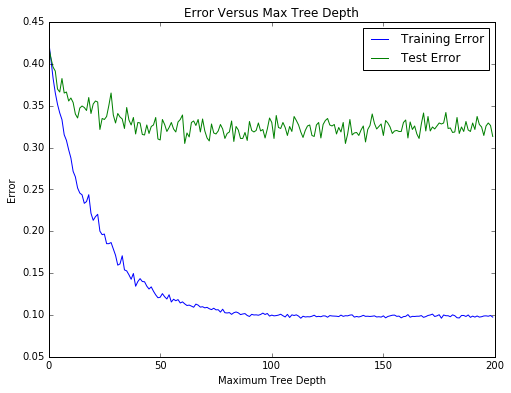

In [21]:
# Plot the data
plt.figure(1, figsize=(8, 6))
plt.plot(max_depth_train_error, label='Training Error')
plt.plot(min_depth_tests_error, label='Test Error')
plt.legend(loc='best')
plt.title('Error Versus Max Tree Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Error')
plt.show()

In [45]:
# Find minimum test error depth.
min_score_max_depth = 1
min_score_max_depth_pos = -1
for i in range(minimum_depth - 1, maximum_depth):
    if max_depth_tests_error[i] < min_score_max_depth:
        min_score_max_depth = max_depth_tests_error[i]
        min_score_max_depth_pos = i + 1
print "Minimum Test Error at Depth of:", min_score_max_depth_pos

Minimum Test Error at Depth of: 109


### Varying Leaf Size

In [33]:
# Set up lists to store training errors and test errors.
min_leaf_train_error = []
min_leaf_tests_error = []

# Train models with different minimum leaf sizes and record
# scores on the models.
minimum_leaf = 1
maximum_leaf = 200
num_trials = 2
for min_leaf_size in range(minimum_leaf, maximum_leaf + 1):
    # Run trials for each minimum leaf size and average the values.
    train_trial_errors = []
    tests_trial_errors = []
    for i in range(0, num_trials):
        clf = RandomForestClassifier(min_samples_leaf=min_leaf_size)
        clf.fit(trainingX, trainingY)
        train_trial_errors.append(1 - clf.score(trainingX, trainingY))
        tests_trial_errors.append(1 - clf.score(testX, testY))
    min_leaf_train_error.append(np.mean(train_trial_errors))
    min_leaf_tests_error.append(np.mean(tests_trial_errors))

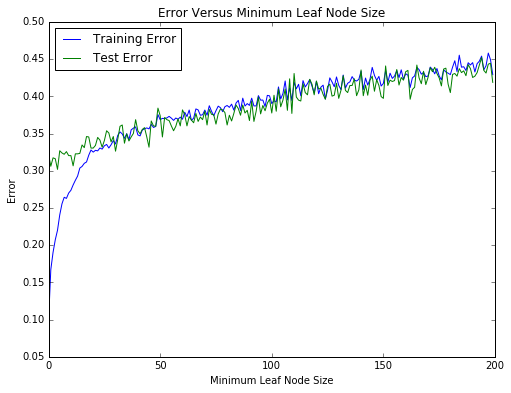

In [23]:
# Plot the data
plt.figure(2, figsize=(8, 6))
plt.plot(min_leaf_train_error, label='Training Error')
plt.plot(min_leaf_tests_error, label='Test Error')
plt.legend(loc='best')
plt.title('Error Versus Minimum Leaf Node Size')
plt.xlabel('Minimum Leaf Node Size')
plt.ylabel('Error')
plt.show()

In [53]:
# Find minimum test error size.
min_score_min_leaf = 1
min_score_min_leaf_pos = -1
for i in range(minimum_leaf - 1, maximum_leaf):
    if min_leaf_tests_error[i] < min_score_min_leaf:
        min_score_min_leaf = min_leaf_tests_error[i]
        min_score_min_leaf_pos = i + 1
print "Minimum Test Error at Size of:", min_score_min_leaf_pos

Minimum Test Error at Size of: 4


### Varying Number of Estimators

In [64]:
# Set up lists to store training errors and test errors.
num_estimators_train_error = []
num_estimators_tests_error = []

# Train models with different minimum leaf sizes and record
# scores on the models.
min_n_estimators = 1
max_n_estimators = 200
step_size = 10
num_trials = 1
for n_estimator in np.arange(min_n_estimators, max_n_estimators, step_size):
    # Run trials for each minimum leaf size and average the values.
    train_trial_errors = []
    tests_trial_errors = []
    for i in range(0, num_trials):
        clf = RandomForestClassifier(n_estimators=n_estimator)
        clf.fit(trainingX, trainingY)
        train_trial_errors.append(1 - clf.score(trainingX, trainingY))
        tests_trial_errors.append(1 - clf.score(testX, testY))
    num_estimators_train_error.append(np.mean(train_trial_errors))
    num_estimators_tests_error.append(np.mean(tests_trial_errors))
print num_estimators_train_error
print num_estimators_tests_error

[0.20292450014920915, 0.097881229483736232, 0.091316025067144091, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046, 0.090420769919427046]
[0.35680190930787592, 0.3114558472553699, 0.28281622911694515, 0.28520286396181382, 0.28997613365155128, 0.27684964200477324, 0.26610978520286399, 0.27207637231503579, 0.27923627684964203, 0.26610978520286399, 0.26610978520286399, 0.26372315035799521, 0.25178997613365151, 0.27446300715990457, 0.26610978520286399, 0.26968973747016711, 0.27446300715990457, 0.26252983293556087, 0.26014319809069208, 0.26133651551312653]


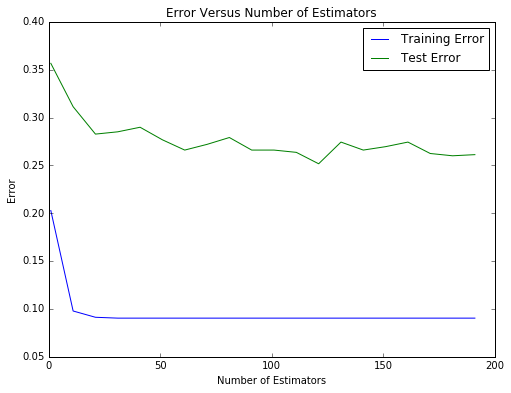

In [66]:
# Plot the data
plt.figure(4, figsize=(8, 6))
plt.plot(np.arange(min_n_estimators, max_n_estimators, step_size), num_estimators_train_error, label='Training Error')
plt.plot(np.arange(min_n_estimators, max_n_estimators, step_size), num_estimators_tests_error, label='Test Error')
plt.legend(loc='best')
plt.title('Error Versus Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error')
plt.show()

### Submission Setup

In [72]:
# Make a model based on best results from above
randfor_model1 = RandomForestClassifier(n_estimators=120)
randfor_model1.fit(whole_trainingX, whole_trainingY)

# Predict data and write to file.
randfor_predict1 = randfor_model1.predict(test_data)

f = open("RandomForest.csv", "w")
f.write("Id,Prediction\n")
for x in range(len(randfor_predict1)):
    f.write(str(x+1) + "," + str(int(randfor_predict1[x])) + "\n")
f.close()

# AdaBoost Random Forests

### Varying Number of Estimators

In [47]:
# Set up lists to store training errors and test errors.
ada_max_depth_train_error = []
ada_max_depth_tests_error = []

# Train models with different max depths and record
# scores on the models.
min_num_estimators = 10
max_num_estimators = 15
num_trials = 1
for num_estimators in range(min_num_estimators, max_num_estimators + 1):
    # Run trials for each max depth and average the values.
    train_trial_errors = []
    tests_trial_errors = []
    for i in range(0, num_trials):
        clf = AdaBoostClassifier(RandomForestClassifier(max_depth=min_score_max_depth_pos), n_estimators=num_estimators)
        clf.fit(trainingX, trainingY)
        train_trial_errors.append(1 - clf.score(trainingX, trainingY))
        tests_trial_errors.append(1 - clf.score(testX, testY))
    ada_max_depth_train_error.append(np.mean(train_trial_errors))
    ada_max_depth_tests_error.append(np.mean(tests_trial_errors))

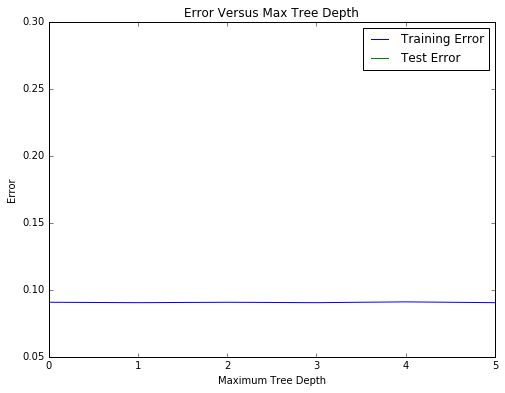

[0.090719188301999432, 0.090420769919427046, 0.090719188301999432, 0.090420769919427046, 0.091017606684571817, 0.090420769919427046]
[0.3054892601431981, 0.28042959427207637, 0.28400954653937949, 0.28639618138424816, 0.28400954653937949, 0.2816229116945107]


In [52]:
# Plot the data
plt.figure(3, figsize=(8, 6))
plt.plot(ada_max_depth_train_error, label='Training Error')
plt.plot(ada_min_depth_tests_error, label='Test Error')
plt.legend(loc='best')
plt.title('Error Versus Max Tree Depth')
plt.xlabel('Maximum Tree Depth')
plt.ylabel('Error')
plt.show()
print ada_max_depth_train_error
print ada_max_depth_tests_error